Saving AustraliaTrain_pp2.csv to AustraliaTrain_pp2.csv
          F-statistic       p-value
costdol     84.999840  5.547149e-20
intrmins     0.175965  6.748945e-01
wtmins       7.642227  5.737488e-03
acctmins     0.092167  7.614623e-01
ttmins       0.446964  5.038331e-01
costneg     84.999840  5.547149e-20
wtneg        7.642227  5.737488e-03


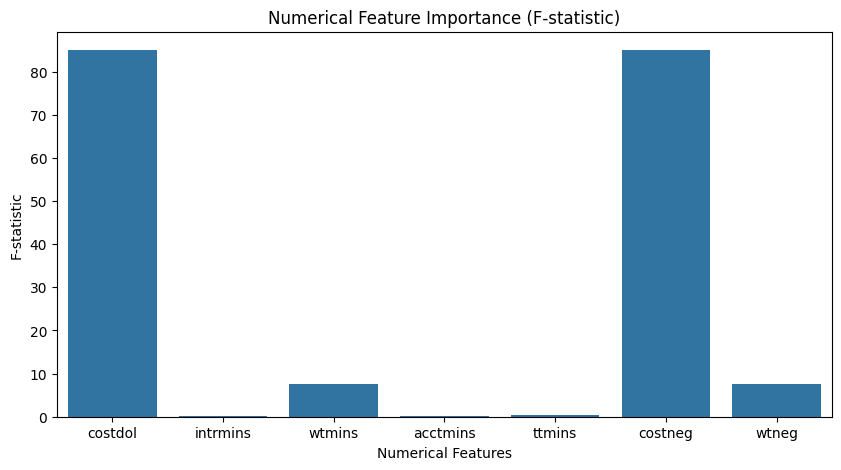

               chi2       p-value
Sydney     6.101655  1.350554e-02
Melbourn   0.430666  5.116621e-01
Brisbane  15.133971  1.001449e-04
Perth     21.297703  3.932023e-06
female     3.629965  5.674801e-02
less31    27.064423  1.967864e-07
above60   68.245132  1.443830e-16
lowinc    11.264522  7.900253e-04
highinc    3.291560  6.963685e-02
edubach    4.681070  3.049675e-02
edugrad    2.171193  1.406171e-01
license    0.008906  9.248130e-01
owner      0.103027  7.482272e-01
reqcar     0.679170  4.098725e-01
adultkid   0.226790  6.339142e-01
multiple   8.739343  3.114167e-03
Ampeak    20.827334  5.026050e-06
Pmpeak     2.154790  1.421259e-01
shopping   9.423491  2.142233e-03
social     6.917162  8.537235e-03
info       0.007148  9.326203e-01
busto      0.573221  4.489819e-01
driveto    2.079083  1.493298e-01
cycleto    1.433710  2.311599e-01
dropedto   0.320846  5.710996e-01
crowded   10.106143  1.477759e-03
overcrow  55.942455  7.462358e-14
activity   0.000077  9.929932e-01
walkfrom   0.6

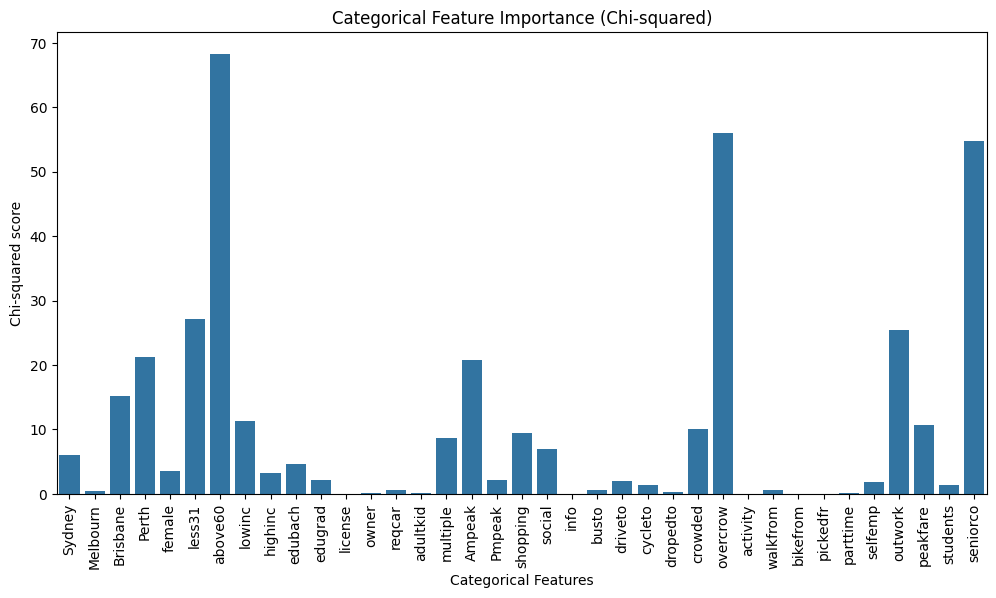

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

files.upload()
df = pd.read_csv("AustraliaTrain_pp2.csv")


X_numerical = df[['costdol', 'intrmins', 'wtmins', 'acctmins', 'ttmins', 'costneg', 'wtneg']]
y_categorical = df['prSat']

model_kbest = SelectKBest(score_func=f_classif, k='all')
model_kbest_fit = model_kbest.fit(X_numerical, y_categorical)

data_num = {"F-statistic": model_kbest.scores_, "p-value": model_kbest.pvalues_}
df_scores_num = pd.DataFrame(data_num, index=X_numerical.columns)
print(df_scores_num)

plt.figure(figsize=(10,5))
sns.barplot(x=df_scores_num.index, y=df_scores_num['F-statistic'])
plt.title("Numerical Feature Importance (F-statistic)")
plt.xlabel('Numerical Features')
plt.ylabel("F-statistic")
plt.show()

X_categorical = df[['Sydney', 'Melbourn', 'Brisbane', 'Perth', 'female', 'less31', 'above60',
                    'lowinc', 'highinc', 'edubach', 'edugrad', 'license', 'owner', 'reqcar',
                    'adultkid', 'multiple', 'Ampeak', 'Pmpeak', 'shopping', 'social', 'info',
                    'busto', 'driveto', 'cycleto', 'dropedto', 'crowded', 'overcrow', 'activity',
                    'walkfrom', 'bikefrom', 'pickedfr', 'parttime', 'selfemp', 'outwork', 'peakfare',
                    'students', 'seniorco']]

chi2_scores, p_values = chi2(X_categorical, y_categorical)
data_cat = {"chi2": chi2_scores, "p-value": p_values}
df_scores_cat = pd.DataFrame(data_cat, index=X_categorical.columns)
print(df_scores_cat)

plt.figure(figsize=(12,6))
sns.barplot(x=df_scores_cat.index, y=df_scores_cat['chi2'])
plt.title("Categorical Feature Importance (Chi-squared)")
plt.xlabel('Categorical Features')
plt.ylabel("Chi-squared score")
plt.xticks(rotation=90)
plt.show()


Saving AustraliaTrain_pp2.csv to AustraliaTrain_pp2 (2).csv
     Feature  Coefficient (Absolute)
0     Sydney                0.000158
1   Melbourn                0.000143
2   Brisbane                0.000122
3      Perth                0.000077
4     female                0.000015
5     less31                0.000005
6    above60                0.000022
7     lowinc                0.000002
8    highinc                0.000008
9    edubach                0.000010
10   edugrad                0.000003
11   license                0.000004
12     owner                0.000002
13    reqcar                0.000009
14  adultkid                0.000030
15  multiple                0.000005
16    Ampeak                0.000025
17    Pmpeak                0.000002
18  shopping                0.000011
19    social                0.000020
20      info                0.000004
21     busto                0.000028
22   driveto                0.000022
23   cycleto                0.000030
24  dropedto   

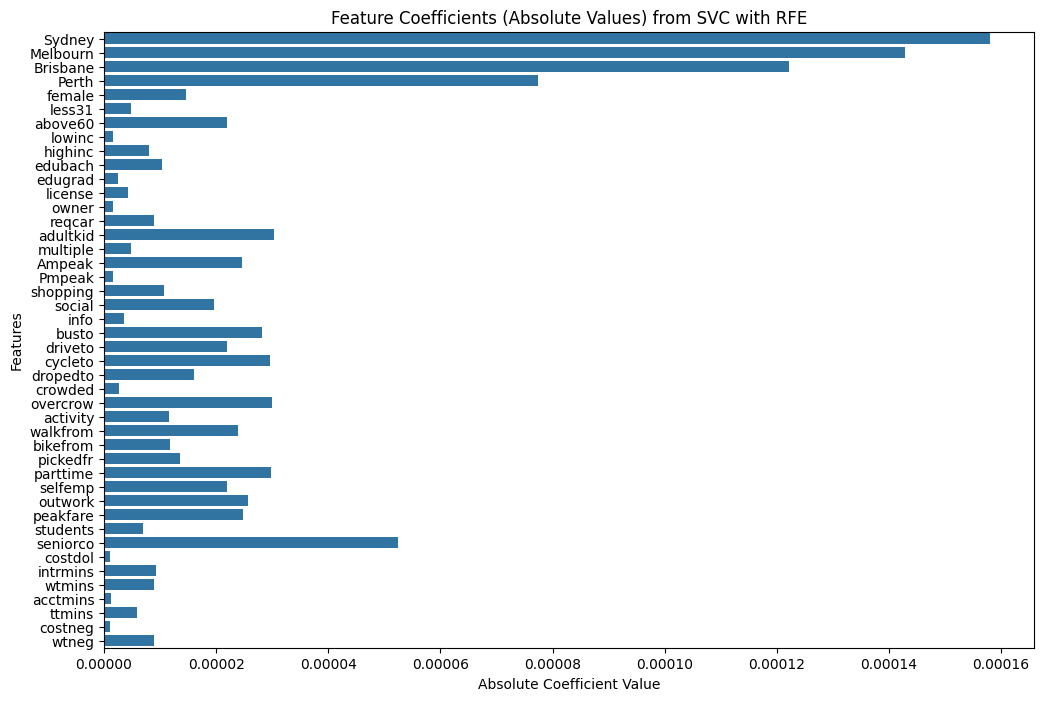

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from google.colab import files
files.upload()
df = pd.read_csv("AustraliaTrain_pp2.csv")

X = df[['Sydney', 'Melbourn', 'Brisbane', 'Perth', 'female', 'less31', 'above60', 'lowinc', 'highinc', 'edubach', 'edugrad', 'license', 'owner', 'reqcar', 'adultkid', 'multiple', 'Ampeak', 'Pmpeak', 'shopping', 'social', 'info', 'busto', 'driveto', 'cycleto', 'dropedto', 'crowded', 'overcrow', 'activity', 'walkfrom', 'bikefrom', 'pickedfr', 'parttime', 'selfemp', 'outwork', 'peakfare', 'students', 'seniorco', 'costdol', 'intrmins', 'wtmins', 'acctmins', 'ttmins', 'costneg', 'wtneg']]
y = df['prSat']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

scaler = StandardScaler()
estimator = SVC(kernel="linear")

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rfe = RFE(estimator, n_features_to_select=44, step=1)

rfe.fit(X_train_scaled, np.ravel(y_train))

coef = np.abs(rfe.estimator_.coef_[0])

coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient (Absolute)": coef
})

print(coef_df)

plt.figure(figsize=(12,8))
sns.barplot(x='Coefficient (Absolute)', y='Feature', data=coef_df)
plt.title("Feature Coefficients (Absolute Values) from SVC with RFE")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Features")
plt.show()
